# Error Propagation

There are generally two modes for calculating the value of a function :

1. Single Step
2. Multiple Step

Let's say we need to calculate the value of $e^{0.1}$ then, we can use *Maclauren Series* to calculate it in a single step, as follows :

(*Maclauren Series is given by :
$e^a = 1 + a + \frac{a^2}{2!} + \frac{a^3}{3!} +....+\frac{a^n}{n!}$*)

In [1]:
% Maclauren Series for computing e^0.1 %
% ==================================== %

% Number of terms to be considered :
n = 5;

% Value of e's power :
a = 0.1;

TrueVal = exp(a);
ApproxVal = 1;

% Running the Maclauren Series for calculating error associated :

for i = 1:n
    ApproxVal = ApproxVal + (power(a,i)/factorial(i));
    SingleStepError = abs(TrueVal - ApproxVal);
end

SingleStepError

SingleStepError =  0.0000000014090


We can also use the *Taylor's Series* to calculate $e^{0.1}$ in a stepped manner with a step size of $h = 0.01$

So, the Taylor's series is given by : $f'(x+h) = f(x)+ hf'(x) + \frac{h^2}{2} f''(x)+.... \implies  f'(x) = \frac{f(x+h) - f(x)}{h}$

For a stepped calculation :

Let's initialize

$x = 0$ and<br>
$step size (h)  = 0.01$

Now, if we consider the first two terms of Taylor's series, then:

$e^{(x+h)} = e^{x} + he^{x} = e^{x}(1+h)$

Now, if we run the Taylor's series multiple times then :

$e^{(0+0.01)} = e^{0.01} = e^{0}(1+0.01)$<br>
$e^{(0.01+0.01)} = e^{0.02} = e^{0.01}(1+0.01)$<br>
$e^{(0.02+0.01)} = e^{0.03} = e^{0.02}(1+0.01)$<br>
....<br>
....<br>
....<br>
$e^{(0.09+0.01)} = e^{0.1} = e^{0.09}(1+0.01)$

Let's perform this multi-step calculation in MATLAB/OCTAVE to calculate $e^{0.1}$ :

In [7]:
% Taylor's Series for computing e^0.1 %
% ==================================== %

% Initializing 'x':

x = 0;

% Initializing step size :

h = 0.01;

% Value of e's power :

a = 0.1;

% Number of steps required for 'x' to be equal to 'a' :

N = a/h;

% True value

T = exp(a);

% Initializing variable to store approximate value :

A = 0;

% Running Taylor's series (Iterative Mode)
% ----------------------------------------

for i = 1:N
    A = exp(x) * (1+h);
    x = x+h;
    MultiStepError = abs(T-A)
end

MultiStepError =  0.095171
MultiStepError =  0.085020
MultiStepError =  0.074768
MultiStepError =  0.064412
MultiStepError =  0.053952
MultiStepError =  0.043387
MultiStepError =  0.032716
MultiStepError =  0.021938
MultiStepError =  0.011051
MultiStepError =  0.000054892


If we compare the errors of sigle-step and multi-step modes of calculation then, we will find that the error is higher in case of multi-step mode of calculation :

In [6]:
ErrorDifference = MultiStepError - SingleStepError 

ErrorDifference =  0.000054890


> ***Note :*** The error in multi-step mode of calculation decreases with decrease in $h$ value or, increase in $N$ value

Now, let's plot a chart to illustrate how the error in a multi-step mode of calculation decreases with decrease in step-size or, increase in $N$ :

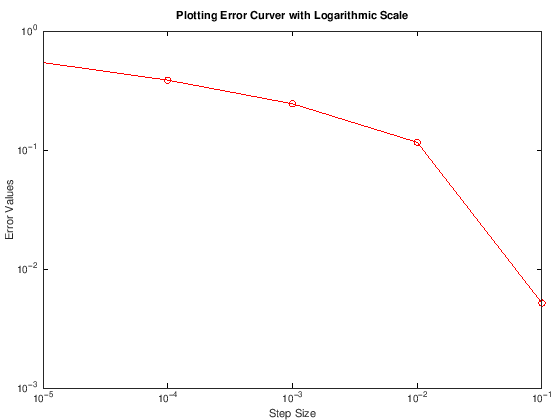

In [9]:
x = 0; %Initialize the 'x'
a = 0.1; % Value of e's power

expVal = exp(x); %Initialize the approximate value
TrueVal = exp(0.1);

for p = 1:5
  h = 10^(-p);
  N = a/h;
  for i = 1:N
    expVal = exp(x) * (1+h);
    x = x+h;
  end
  
  MultiErr = abs(TrueVal - expVal);
  hAll(p) = h;
  errAll(p) = MultiErr;
  
  % Plotting error with log scale :
  
  loglog(hAll,errAll,'-ro');
  xlabel("Step Size");
  ylabel("Error Values");
  title("Plotting Error Curver with Logarithmic Scale");
end